<a href="https://colab.research.google.com/github/jh941213/crawling/blob/main/9_API%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%8F%E1%85%B3%E1%84%85%E1%85%A9%E1%86%AF%E1%84%85%E1%85%B5%E1%86%BC(%E1%84%8F%E1%85%A1%E1%84%8F%E1%85%A1%E1%84%8B%E1%85%A91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14. 카카오 API를 이용한 크롤링(1)

## 1.카카오 API 키 발급받기

### 1-1. Kakao Developers 링크에 들어가서 로그인을 한 뒤, [내 애플리케이션]을 클릭한다.
https://developers.kakao.com/

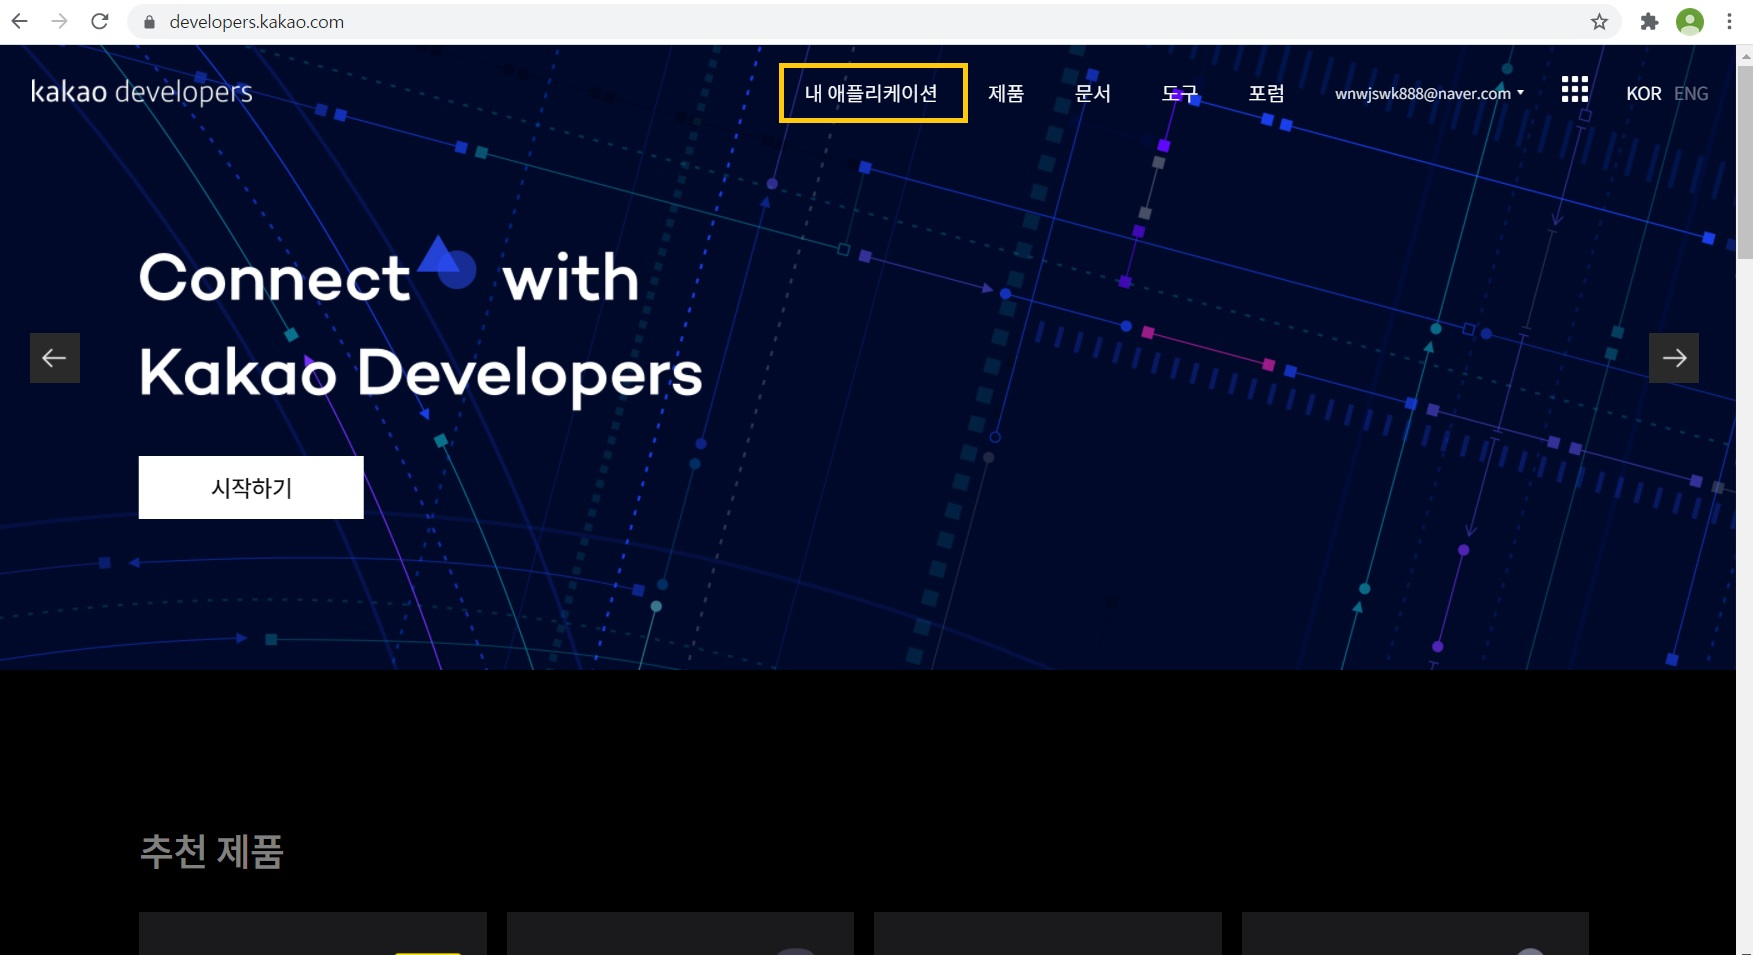

### 1-2. [애플리케이션 추가하기]를 클릭하여 애플리케이션을 추가해준다.

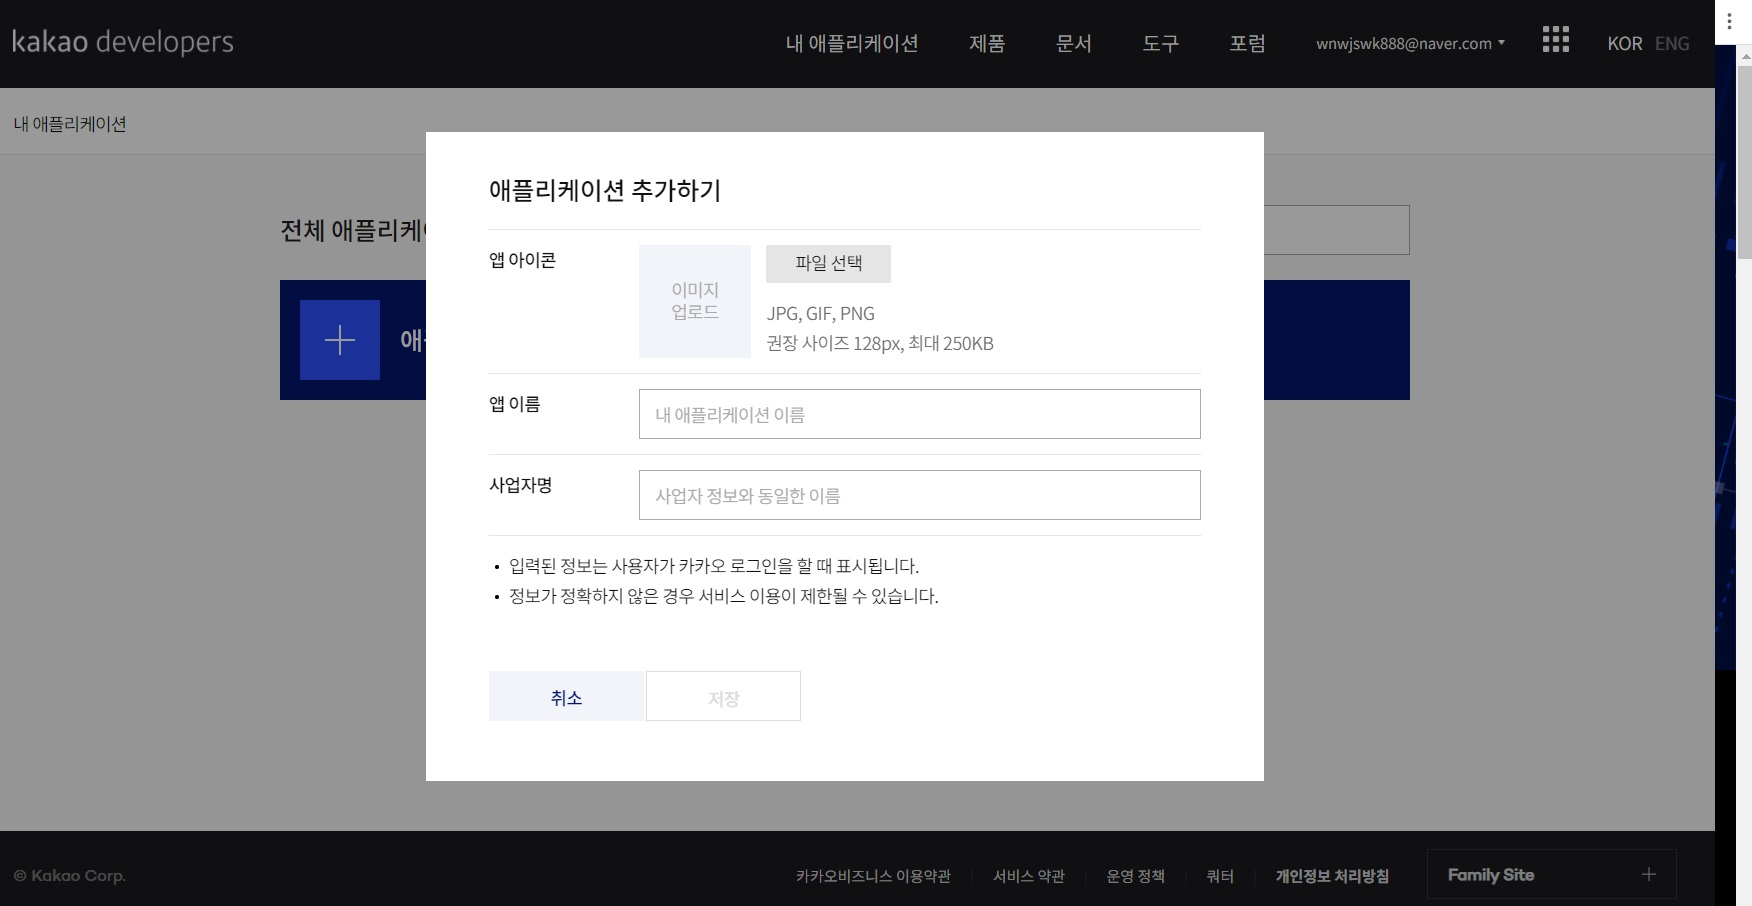

애플리케이션을 추가하면 나오는 Admin 키가 API 키가 된다.(4개의 키 중에서 Admin Key는 통합적인 Key이다)

## 2. 카카오 API 이용해서 Daum 웹문서 검색하기
Daum 웹 검색 가이드(웹문서, 동영상, 이미지, 블로그, 책 카페 검색)

: https://developers.kakao.com/docs/latest/ko/daum-search/dev-guide

### 2-1. API 키와 검색어를 입력하여 페이지를 요청한다.

개발가이드를 참고하여 올바른 url로 변경해준다.

url = Host + Get

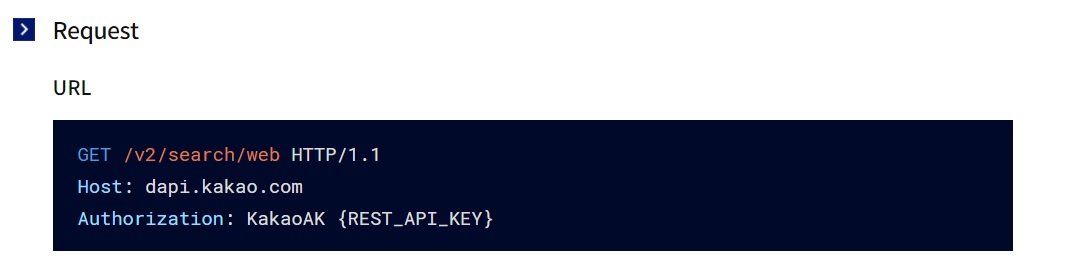

In [ ]:
import requests
import json

# Host + Get 형식으로 url을 만들어줘야 한다.
url = "https://dapi.kakao.com/v2/search/web"  

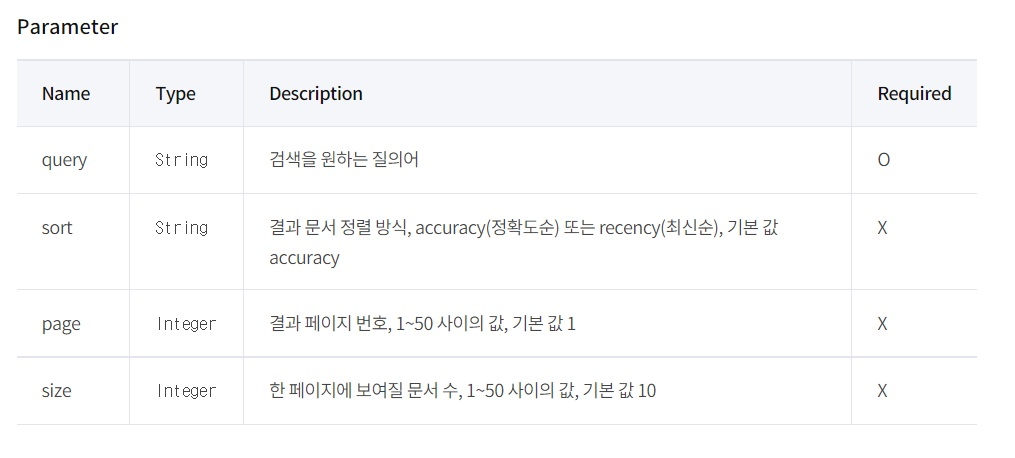

Parameter에 들어갈 수 있는 변수는 위와 같다. 이때 검색어(query) 값은 필수!

In [ ]:
params = {'query' : '코로나'}   #키워드 
header = {'Authorization': 'KakaoAK {key}'}  #Admin key 입력 / key가 12345라면 'KakaoAK 12345' 와 같이 입력★

resp = requests.get(url, headers=header, params=params) 
print(resp)

<Response [200]>


### 2-2. 용청된 페이지에서 응답 바디를 받아온다.
카카오 웹문서 검색의 응답 바디는 meta, documents로 구성된 JSON 객체이다.

In [ ]:
#어떻게 이루어져 있는지 보자
#크게 'documents', 'meta'로 나눠져 있다.
tokens = resp.json()
tokens

{'documents': [{'contents': '11,106,027명 21.6% 최종 업데이트 : 2021-08-20 09:38 국내 예방접종 상세 현황 예방접종센터 찾기 <b>코로나</b>19 국내 시도별 발생동향 선별진료소 찾기 팩트체크 관련뉴스 &#34;신규 환자 2천500명 이상 지속 발생 시...',
   'datetime': '2021-08-20T13:34:22.000+09:00',
   'title': '[<b>코로나</b>19] 관련 기사 모아보기',
   'url': 'https://www.ytn.co.kr/issue/corona.php'},
  {'contents': '여기로 연결됩니다. (한시적 넘겨주기) SARS-CoV-2에 의해 발병하는 급성 호흡기 감염병에 대한 내용은 <b>코로나</b>바이러스감염증-19 문서 를 의 번 문단을 의 부분을 , 이 감염병의 원인이 되는 바이러스에 대한...',
   'datetime': '2021-07-30T00:00:00.000+09:00',
   'title': '<b>코로나</b> - 나무위키',
   'url': 'https://namu.wiki/w/%EC%BD%94%EB%A1%9C%EB%82%98'},
  {'contents': 'SBS 뉴스 - 라이브 생방송',
   'datetime': '2021-08-20T05:23:43.000+09:00',
   'title': '<b>코로나</b>19 현황',
   'url': 'https://news.sbs.co.kr/news/newsHotIssueList.do?tagId=10000050973&plink=FOOT&cooper=NAVER'},
  {'contents': '<b>코로나</b>19 거리두기 체계 개선해주세요. ★ 제안 요약 자영업자•특정 업종 영업제한 정지, 모임 금지(이동 제한)를 시키는 것이 아니라, 거리두기단계에 따른 다중이용업소, 집합시설, 공공시설 등의 방역수칙...',
   'datetime': '2021-08-19T01:08

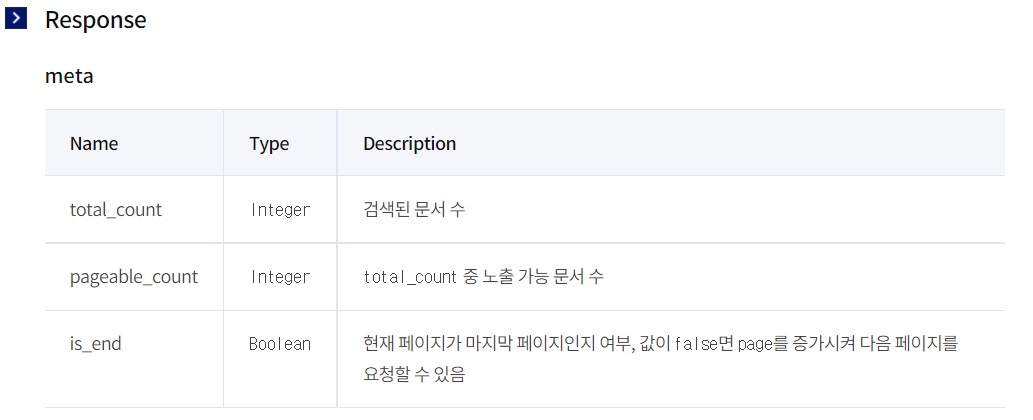



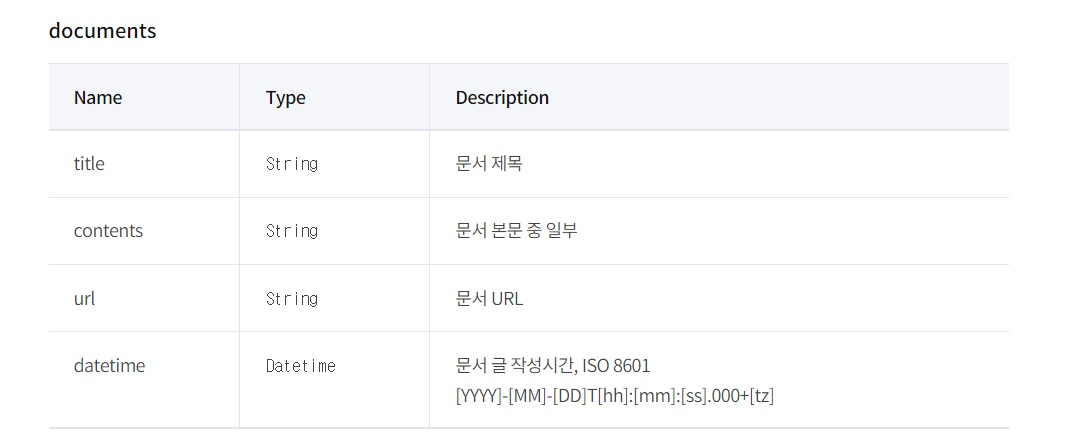

### 2-3. 첫 번째 웹문서의 문서 제목, 문서 본문 일부, 문서 URL, 작성 시간을 추출해보자.

In [ ]:
import re
#제목
title_bold = tokens['documents'][0]['title'] 
title = re.sub("\<b>|\</b>","",title_bold)  #위에 tokens을 보면 <b>코로나</b> 라는 부분이 있다(bold체를 나타내는 것으로 제거해주어야 한다.)

#문서본문
contents_bold = tokens['documents'][0]['contents']
contents = re.sub("\<b>|\</b>","",contents_bold)

#url과 작성시간
url = tokens['documents'][0]['url']
datetime = tokens['documents'][0]['datetime']

print(title)
print(contents)
print(url)
print(datetime)

[코로나19] 관련 기사 모아보기
11,106,027명 21.6% 최종 업데이트 : 2021-08-20 09:38 국내 예방접종 상세 현황 예방접종센터 찾기 코로나19 국내 시도별 발생동향 선별진료소 찾기 팩트체크 관련뉴스 &#34;신규 환자 2천500명 이상 지속 발생 시...
https://www.ytn.co.kr/issue/corona.php
2021-08-20T13:34:22.000+09:00


### 2-4. 전체 웹문서에 대한 정보를 데이터프레임으로 저장한다.

In [ ]:
import pandas as pd
import re

corona = {
            '제목' : [],
            '본문일부' : [],
            'url' : [],
            '작성시간' : []
}

for i in range(len(tokens['documents'])):

    #제목
    title_bold = tokens['documents'][i]['title'] 
    title = re.sub("\<b>|\</b>","",title_bold)  #위에 tokens을 보면 <b>코로나</b> 라는 부분이 있다(bold체를 나타내는 것으로 제거해주어야 한다.)
    corona['제목'].append(title)

    #문서본문
    contents_bold = tokens['documents'][i]['contents']
    contents = re.sub("\<b>|\</b>","",contents_bold)
    corona['본문일부'].append(contents)

    #url과 작성시간
    url = tokens['documents'][i]['url']
    datetime = tokens['documents'][i]['datetime']
    corona['url'].append(url)
    corona['작성시간'].append(datetime)

corona_df = pd.DataFrame(corona)
display(corona_df)

,제목,본문일부,url,작성시간
0,[코로나19] 관련 기사 모아보기,"11,106,027명 21.6% 최종 업데이트 : 2021-08-20 09:38 국...",https://www.ytn.co.kr/issue/corona.php,2021-08-20T13:34:22.000+09:00
1,코로나 - 나무위키,여기로 연결됩니다. (한시적 넘겨주기) SARS-CoV-2에 의해 발병하는 급성 호...,https://namu.wiki/w/%EC%BD%94%EB%A1%9C%EB%82%98,2021-07-30T00:00:00.000+09:00
2,코로나19 현황,SBS 뉴스 - 라이브 생방송,https://news.sbs.co.kr/news/newsHotIssueList.d...,2021-08-20T05:23:43.000+09:00
3,코로나19 거리두기 체계 개선해주세요 (코로나19 전쟁의 승리),코로나19 거리두기 체계 개선해주세요. ★ 제안 요약 자영업자•특정 업종 영업제한 ...,https://www1.president.go.kr/petitions/597092,2021-08-19T01:08:21.000+09:00
4,"코로나 검사만 13번, 17세 **이는 코로나19로 죽은 것이 아닙니다. K방역 뒤...",이글을 올리는 저는 작년 3월 코로나19 대확산 시기에 제대로 된 진료를 받지 못해...,https://www1.president.go.kr/petitions/596607,2021-08-18T17:08:14.000+09:00
5,코로나19: 2020년 세계 전기차 시장 전망,"프로스트앤설리번에 따르면, 코로나19는 전 세계 자동차 판매량을 전년대비 14.2%...",https://www.autoelectronics.co.kr/article/arti...,2021-08-17T21:10:26.000+09:00
6,"KBO, 코로나19 대응 통합 매뉴얼 배포","- KBO 코로나19 대응 태스크포스(TF) 통합 매뉴얼 수립, 각 구단에 배포 -...",https://www.koreabaseball.com/News/Notice/View...,2021-08-17T09:51:07.000+09:00
7,“과학이 코로나 시대 이전으로 돌아가게 해줄 것” – Sciencetimes,"칠레, 영국, 이스라엘, 캐나다 등 신종 코로나바이러스 감염증-19(Covid-19...",https://www.sciencetimes.co.kr/news/%ea%b3%bc%...,2021-08-20T00:00:00.000+09:00
8,‘코로나 바이러스 우한 연구소 기원설’ 시간표 총정리,위해 도착한 후 우한 바이러스 연구소에서 기자들을 옮기는 보안 관리. / 출처: N...,https://ppss.kr/archives/242319,2021-08-17T07:07:04.000+09:00
9,"KBO 리그 1군 전 선수단, ‘코로나19 자가검사 키트’로 전수검사 실시","KBO(총재 정지택)가 7월 10일(토), 11일(일) 양일에 걸쳐 ‘코로나19 자...",https://www.koreabaseball.com/News/Notice/View...,2021-08-18T09:55:39.000+09:00


## 3. 카카오 API 이용해서 Daum 이미지 검색하기
Daum 이미지 검색 개발 가이드(웹문서, 동영상, 이미지, 블로그, 책 카페 검색)

https://developers.kakao.com/docs/latest/ko/daum-search/dev-guide

### 3-1. API 키와 검색어를 입력하여 페이지를 요청하고, 응답 바디를 받아온다.



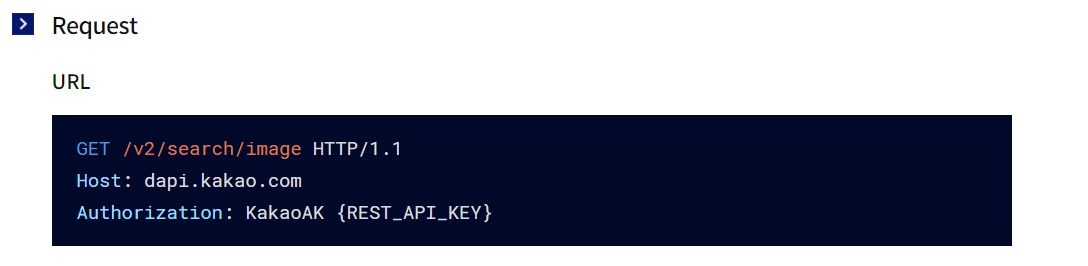

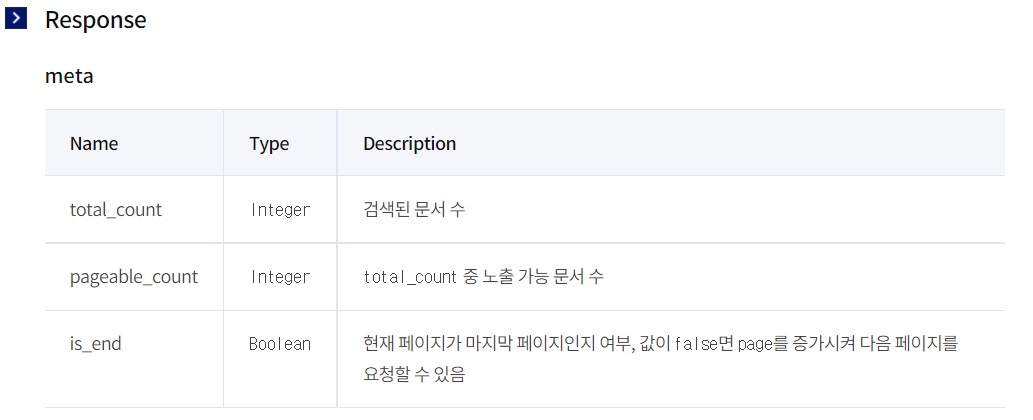

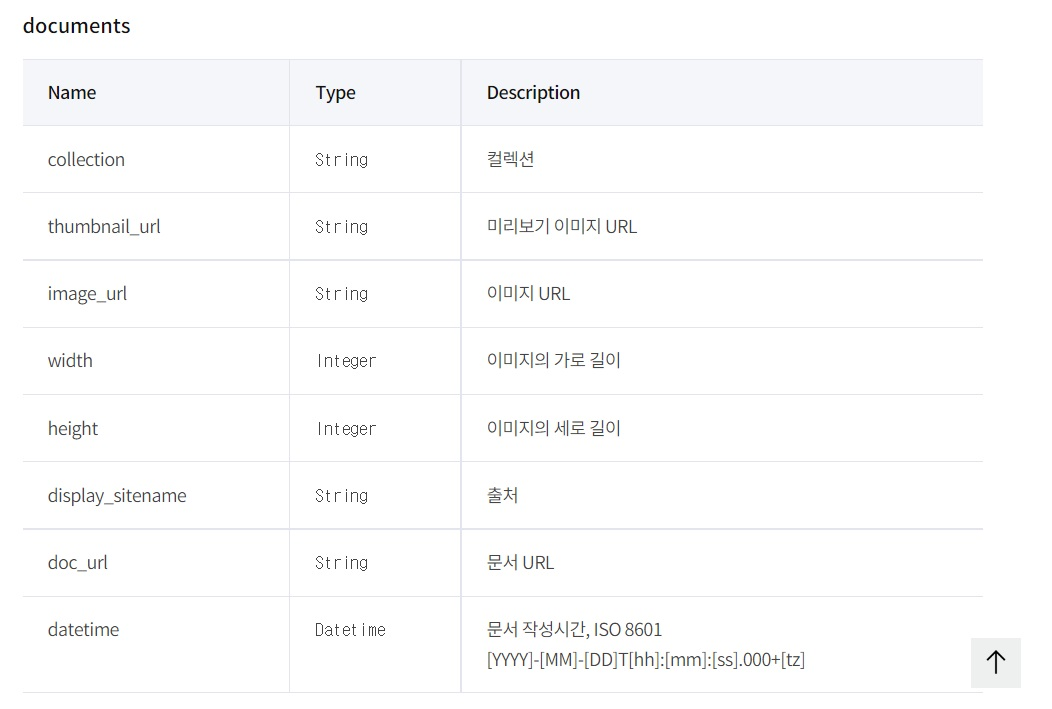

얻을 수 있는 documents 값이 무엇인지 살펴보고 필요한 값을 가져온다!

In [ ]:
import requests
import json

url = "https://dapi.kakao.com/v2/search/image"  # Host + GET

params = {'query' : '강아지'}   #키워드입력! / 파라미터 변수에 관해선 개발가이드 참고!
header = {'Authorization': 'KakaoAK {key}'}  #Admin키 입력

resp = requests.get(url, headers=header, params=params) 
print(resp)

<Response [200]>


In [ ]:
tokens = resp.json()
# tokens

{'documents': [{'collection': 'blog',
   'datetime': '2018-12-08T07:45:00.000+09:00',
   'display_sitename': '티스토리',
   'doc_url': 'http://doggycorgi.tistory.com/140',
   'height': 411,
   'image_url': 'http://t1.daumcdn.net/cfile/tistory/996690445C06B6C328',
   'thumbnail_url': 'https://search2.kakaocdn.net/argon/130x130_85_c/BDMkLmgwvV3',
   'width': 580},
  {'collection': 'cafe',
   'datetime': '2005-04-20T18:33:15.000+09:00',
   'display_sitename': 'Daum카페',
   'doc_url': 'http://cafe.daum.net/hdjm/LVjG/65',
   'height': 307,
   'image_url': 'http://cfs10.planet.daum.net/upload_control/pcp_download.php?fhandle=MzR1Q3FAZnMxMC5wbGFuZXQuZGF1bS5uZXQ6LzEwMDE3NS8wLzAuanBnLnRodW1i&filename=%EA%B0%95%EC%95%84%EC%A7%80.jpg',
   'thumbnail_url': 'https://search4.kakaocdn.net/argon/130x130_85_c/3yPofU46mgV',
   'width': 460},
  {'collection': 'blog',
   'datetime': '2017-07-04T17:26:46.000+09:00',
   'display_sitename': '티스토리',
   'doc_url': 'http://davenue-cy.tistory.com/58',
   'height': 36

### 3-2. 받아온 응답 body에서 meta데이터(검색된 문서 수, 노출 가능 문서 수, 현재 페이지가 마지막 페이지인지 여부)를 출력해본다.(meta 이미지 참고)

In [ ]:
print('검색된 문서 수 :',tokens['meta']['total_count'])
print('노출 가능 문서 수 :', tokens['meta']['pageable_count'])
print('마지막 페이지 여부 :',tokens['meta']['is_end'])

검색된 문서 수 : 28417406
노출 가능 문서 수 : 3983
마지막 페이지 여부 : False


### 3-3. 현재 검색된 이미지 문서 수를 출력하고, 첫 번째 이미지의 컬렉션, 출처, 이미지 url, 문서 url을 출력한다.(documents 이미지 참고)

In [ ]:
print('이미지 수 :',len(tokens['documents']))
print()
print('컬렉션 :',tokens['documents'][0]['collection'])
print('출처 :',tokens['documents'][0]['display_sitename'])
print('이미지 url :',tokens['documents'][0]['collection'])
print('문서 url :',tokens['documents'][0]['doc_url'])

이미지 수 : 80

컬렉션 : blog
출처 : 티스토리
이미지 url : blog
문서 url : http://doggycorgi.tistory.com/140


## 4. 마지막 페이지 여부 변수를 이용하여 여러 페이지에 걸쳐 이미지 크롤링하기

### 4-1. parameter에 page 변수를 입력할 수 있고, 응답 body의 meta 데이터 중에 'is_end' = 현재 페이지가 마지막 페이지인지 여부를 알려주는 변수가 있다.
(앞에 나왔던 parameter,response 이미지 참고)

<br>

is_end 값을 확인해보자

In [ ]:
url = "https://dapi.kakao.com/v2/search/image"  # Host + GET

#페이지 지정
page = 1 
params = {'query' : '강아지',
          'page' : page}   #page parameter(정수형)

header = {'Authorization': 'KakaoAK {key}'}  #Admin키 입력

resp = requests.get(url, headers=header, params=params) 

tokens = resp.json()

is_end = tokens['meta']['is_end']  #is_end

print(f'{page}페이지의 마지막 페이지 여부 : {is_end}')

1페이지의 마지막 페이지 여부 : False


### 4-2. 마지막 페이지가 아니면 다음페이지를 가져온다. (10페이지까지 가져와보자)
while문을 사용하여 마지막 페이지가 아니면 "응답 body 가져오기 & 마지막페이지 확인"을 반복한다.

In [ ]:
url = "https://dapi.kakao.com/v2/search/image"  # Host + GET

#페이지 지정
page = 1 
params = {'query' : '강아지',
        'page' : page}   #page parameter(정수형)

header = {'Authorization': 'KakaoAK {key}'}  #Admin키 입력

while page<=10 :
    print(f'현재 {page}페이지 입니다')
    resp = requests.get(url, headers=header, params=params) 

    tokens = resp.json()
    is_end = tokens['meta']['is_end']

    if is_end == True :
        break
    else :
        page += 1  #1페이지씩 더해준다.

현재 1페이지 입니다
현재 2페이지 입니다
현재 3페이지 입니다
현재 4페이지 입니다
현재 5페이지 입니다
현재 6페이지 입니다
현재 7페이지 입니다
현재 8페이지 입니다
현재 9페이지 입니다
현재 10페이지 입니다


### 4-3. 10페이지에 걸쳐 크롤링한 이미지의 컬렉션, 출처, 이미지 url, 문서 url를 데이터프레임으로 저장해본다.

In [ ]:
url = "https://dapi.kakao.com/v2/search/image"  # Host + GET

dog = {'컬렉션' : [],
       '출처' : [],
       '이미지 url' : [],
       '문서 url' : []}

#페이지 지정
page = 1 


header = {'Authorization': 'KakaoAK {key}'}  #Admin키 입력

while page<=10 :
    print(f'현재 {page}페이지 크롤링중')

    params = {'query' : '강아지',
        'page' : page}   #page parameter(정수형)

    resp = requests.get(url, headers=header, params=params) 

    tokens = resp.json()
    is_end = tokens['meta']['is_end']

    for i in range(len(tokens['documents'])) :
        dog['컬렉션'].append(tokens['documents'][i]['collection'])
        dog['출처'].append(tokens['documents'][i]['display_sitename'])
        dog['이미지 url'].append(tokens['documents'][i]['collection'])
        dog['문서 url'].append(tokens['documents'][i]['doc_url'])

    if is_end == True :
        break
    else :
        page += 1  #1페이지씩 더해준다.

현재 1페이지 크롤링중
현재 2페이지 크롤링중
현재 3페이지 크롤링중
현재 4페이지 크롤링중
현재 5페이지 크롤링중
현재 6페이지 크롤링중
현재 7페이지 크롤링중
현재 8페이지 크롤링중
현재 9페이지 크롤링중
현재 10페이지 크롤링중


In [ ]:
import pandas as pd

dog_df = pd.DataFrame(dog)
display(dog_df)

,컬렉션,출처,이미지 url,문서 url
0,blog,티스토리,blog,http://doggycorgi.tistory.com/140
1,cafe,Daum카페,cafe,http://cafe.daum.net/hdjm/LVjG/65
2,blog,티스토리,blog,http://davenue-cy.tistory.com/58
3,blog,네이버블로그,blog,http://blog.naver.com/jyo642/221698484884
4,blog,네이버블로그,blog,http://blog.naver.com/kjihee17/150143913497
...,...,...,...,...
795,blog,네이버블로그,blog,http://blog.naver.com/sng76/220186520939
796,blog,네이버블로그,blog,http://blog.naver.com/skj1279/30006952344
797,blog,네이버블로그,blog,http://blog.naver.com/heesu4936/220581711289
798,blog,네이버블로그,blog,http://blog.naver.com/nagic99/220578437274
